<a href="https://colab.research.google.com/github/Amin-Lotfian/Python-project-excercises-and-projects/blob/main/21_boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
!pip install datasets
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# 1

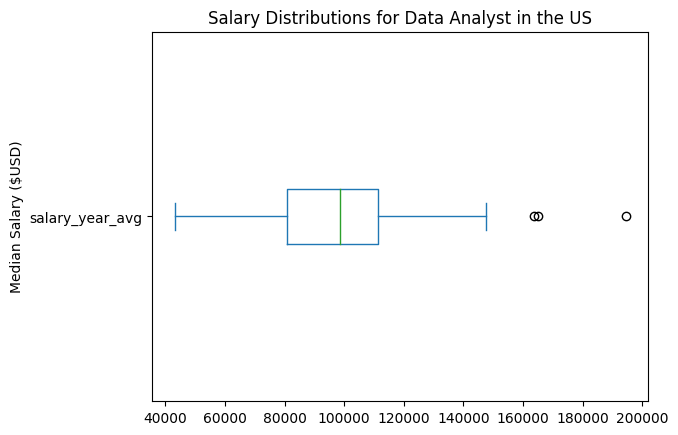

In [ ]:
df_DA_Ir = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Ireland')].copy()
df_DA_Ir = df_DA_Ir.dropna(subset=['salary_year_avg'])
df_DA_Ir['salary_year_avg'].plot(kind='box', vert=False)

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

In [ ]:
help(df.plot)

# 2
اینجا دیگه شرط دیتا انالیست بودن رو حذف کردیم

df['job_title_short'] == 'Data Analyst'

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']


df_Ir = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Ireland')].dropna(subset=['salary_year_avg'])

#اقا این به ما ۳ تا سری تحویل میده. یعنی یه سری هست که فقط ۳ تا سری توش هست.
job_list = [df_Ir[df_Ir['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

In [ ]:
job_list[2]

,salary_year_avg
130321,157500.0
373020,166419.5
381330,53416.5
463689,89100.0
523674,115000.0
623578,88128.0


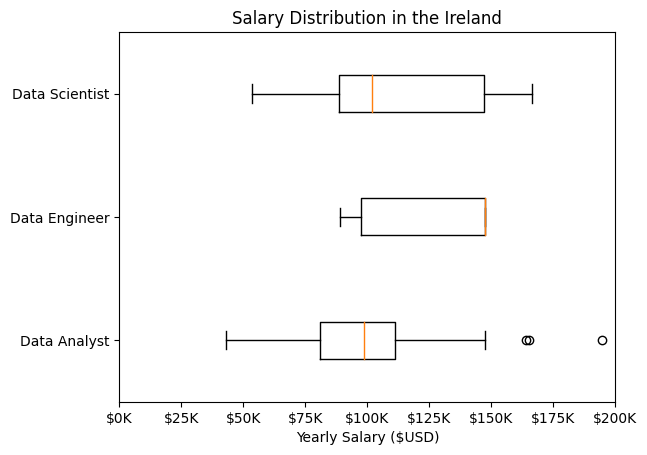

In [ ]:

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the Ireland')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 200000)


ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

# 3

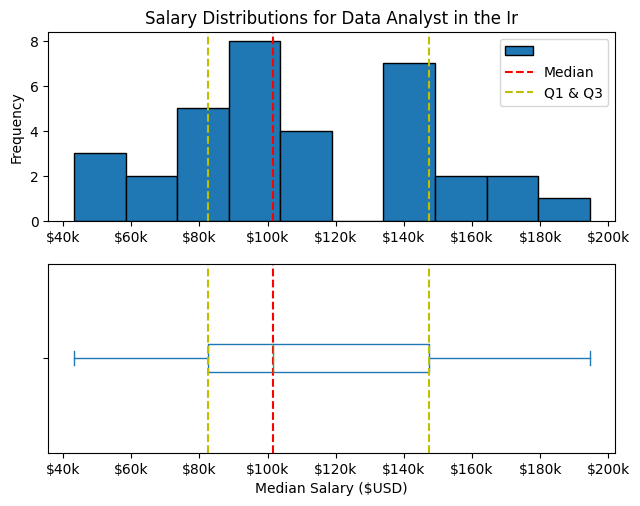

In [ ]:
# plot histogram and boxplot for df_Ir['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_Ir['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=10, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the Ir')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_Ir['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_Ir['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_Ir['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_Ir['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_Ir['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_Ir['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_Ir['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()